<a href="https://colab.research.google.com/github/jsroa15/KKBOX/blob/main/Final_EDA_and_FE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The objective is to merge all datasets to create a final dataset to train and evaluate our final model. As always, we are going to follow the structure of EDA and Feature Engineering.

**Exploratory Data Analysis**

1.  Load data
2.  Merge all dataset
2.  General statistics
3.  Data Visualization
4.  Data Cleaning
5.  Fixing formats

**Feature Engineering**
7.  Create new features
6.  Data Transformation
7.  Outlier detection
8.  Scaling features


**Import packages**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# **Exploratory Data Analysis**


## 1. Load Data

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KKBOX/train.csv')
transactions=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KKBOX/df_transactions.csv')
users=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KKBOX/df_members.csv')
logs=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KKBOX/df_logs.csv')

## 2. Merge all datasets

In [3]:
df=df.merge(transactions,on='msno',how='left')
df=df.merge(users,on='msno',how='left')
df=df.merge(logs,on='msno',how='left')

# 3. General Statistics

In [4]:
#First rows of the dataset

df.head()

,msno,is_churn,regist_trans,mst_frq_plan_days,mst_frq_pay_met,revenue,is_auto_renew,regist_cancels,qtr_trans,city,bd,gender,registered_via,registration_init_time,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,2,7,38,149,0,0,1,18.0,36.0,female,9.0,2005-04-06,0.621227,0.274653,0.447940,0.173287,2.880669,2.962292,8.440285
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,23,30,39,3458,1,2,3,10.0,38.0,male,9.0,2005-04-07,0.444694,0.193904,0.175250,0.179176,2.601858,2.342516,8.087119
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1,10,30,39,1492,1,1,1,11.0,27.0,female,9.0,2005-10-16,1.168699,0.469950,0.360776,0.499874,3.253308,3.355790,8.697465
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1,2,410,17,1788,0,0,1,13.0,23.0,female,9.0,2005-11-02,1.830671,1.018070,0.974649,0.850550,2.618528,2.699278,8.174752
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1,8,30,38,3576,0,0,1,3.0,27.0,male,9.0,2005-12-28,0.757936,0.378817,0.493943,0.969785,4.400313,4.456234,9.985234


In [5]:
#Some statistics

round(df.describe(),2)

,is_churn,regist_trans,mst_frq_plan_days,mst_frq_pay_met,revenue,is_auto_renew,regist_cancels,qtr_trans,city,bd,registered_via,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
count,992931.00,992931.00,992931.00,992931.00,992931.00,992931.00,992931.00,992931.00,877161.00,877161.00,877161.00,787844.00,787844.00,787844.00,787844.00,787844.00,787844.00,787844.00
mean,0.06,16.00,32.91,39.02,2174.69,0.88,0.28,1.96,5.88,13.45,6.91,1.23,0.55,0.42,0.44,2.61,2.78,8.11
std,0.24,8.25,29.56,3.60,1234.66,0.32,0.58,1.24,6.42,20.23,1.90,0.59,0.31,0.25,0.27,0.76,0.63,0.83
min,0.00,1.00,0.00,3.00,0.00,0.00,0.00,1.00,1.00,-3152.00,3.00,0.00,0.00,0.00,0.00,0.00,0.69,-1.99
25%,0.00,9.00,30.00,38.00,1188.00,1.00,0.00,1.00,1.00,0.00,7.00,0.81,0.33,0.24,0.25,2.17,2.40,7.66
50%,0.00,17.00,30.00,41.00,1920.00,1.00,0.00,1.00,1.00,0.00,7.00,1.17,0.51,0.39,0.40,2.62,2.79,8.14
75%,0.00,23.00,30.00,41.00,3278.00,1.00,0.00,3.00,13.00,27.00,9.00,1.60,0.72,0.56,0.59,3.07,3.17,8.60
max,1.00,71.00,450.00,41.00,8138.00,1.00,20.00,4.00,22.00,2016.00,13.00,4.60,2.77,2.20,2.30,6.06,6.04,11.71


In [6]:
#Basic info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 992931 entries, 0 to 992930
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   msno                    992931 non-null  object 
 1   is_churn                992931 non-null  int64  
 2   regist_trans            992931 non-null  int64  
 3   mst_frq_plan_days       992931 non-null  int64  
 4   mst_frq_pay_met         992931 non-null  int64  
 5   revenue                 992931 non-null  int64  
 6   is_auto_renew           992931 non-null  int64  
 7   regist_cancels          992931 non-null  int64  
 8   qtr_trans               992931 non-null  int64  
 9   city                    877161 non-null  float64
 10  bd                      877161 non-null  float64
 11  gender                  877161 non-null  object 
 12  registered_via          877161 non-null  float64
 13  registration_init_time  877161 non-null  object 
 14  num_25              

We have to fix some datatypes

In [7]:
#Missing Values

pd.DataFrame({'%MissingValues':round((df.isna().sum()/df.shape[0])*100,2)})

,%MissingValues
msno,0.00
is_churn,0.00
regist_trans,0.00
mst_frq_plan_days,0.00
mst_frq_pay_met,0.00
revenue,0.00
is_auto_renew,0.00
regist_cancels,0.00
qtr_trans,0.00
city,11.66


We have some missing values, but in later stages we can find the way to impute them.

In [8]:
#Checking for duplicated values

print(df.shape)
print(df.msno.nunique())

(992931, 21)
992931


There are no duplicated values in the dataset.

# 4. Data Visualization

Let's explore the data visually and discover useful insights.



In [9]:
def plotting_numerical(data,rows,cols,x_list,size,log=False,hue=None):
  '''Plot numerical data in subplots using Seaborn
    Parameters
    --------------
      data:Data frame with data
      rows:Number of rows in subplot
      cols:Number of columns in subplot
      x_list:List with features names
      size:Tupple with size of plot
      log: Boolean. Decide if histograms are showed with original scale (False) or Log-scale (True). Default False
      hue: Variable name. If want to explore with one categorical feature. Default None
    
  '''
  
  sns.set_style("whitegrid")

  pos=0
  f, axes = plt.subplots(nrows=rows, ncols=cols,figsize=size)
  for i in range(0,rows):
    for j in range(0,cols):
      
      sns.histplot(data=data,ax=axes[i,j],x=x_list[pos],bins=50,log_scale=log,hue=hue,multiple='stack')
      pos+=1

  return(plt.show())

In [10]:
numerical=['regist_trans','mst_frq_plan_days','revenue','regist_cancels','bd','num_25',
           
           'num_50','num_75','num_985','num_100','num_unq','total_secs']

categorical=['is_churn','mst_frq_pay_met','is_auto_renew','qtr_trans','city',
             'gender','registered_via'
            
]

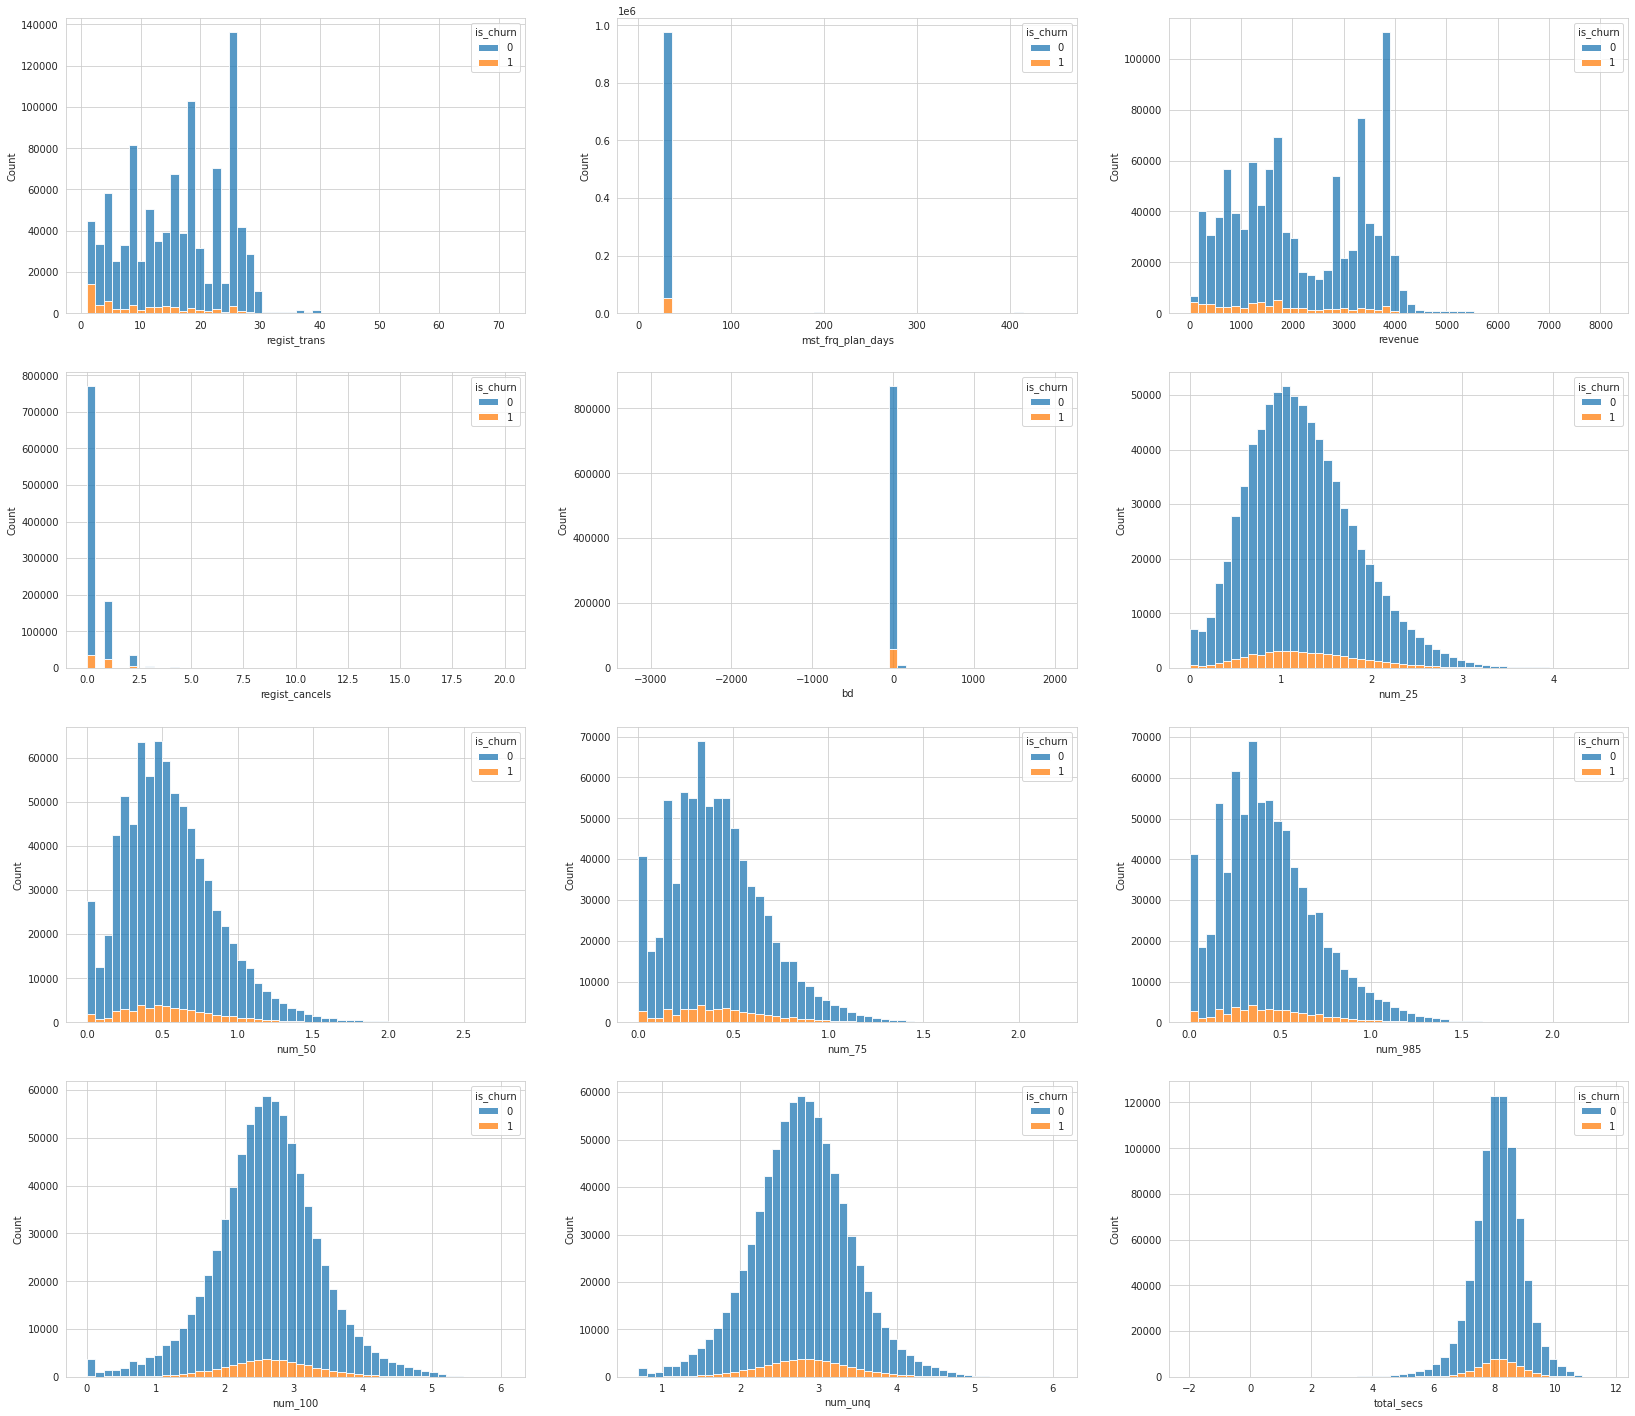

In [11]:
plotting_numerical(df,4,3,numerical,(28,25),hue='is_churn')

From the above we can see that most of the features have a good distribution. We have to explore deeper some outliers in features> ```mst_frq_plan_days, regist_cancels, bd```

In [12]:
def plotting_categorical(data,rows,cols,hue,x_list,size):
  '''Plot categorical data in subplots using Seaborn
  Parameters
  --------------
    data:Data frame with data
    rows:Number of rows in subplot
    cols:Number of columns in subplot
    hue:Feature to distinguish in the plot
    x_list:List with features names
    size:Tupple with size of plot
    
  '''
  
  sns.set_style("whitegrid")
  
  
  pos=0
  f, axes = plt.subplots(nrows=rows, ncols=cols,figsize=size)
  for i in range(0,rows):
    for j in range(0,cols):
      
      sns.countplot(ax=axes[i,j],x=x_list[pos],hue=hue,data=data)
      pos+=1

  return(plt.show())

IndexError: ignored

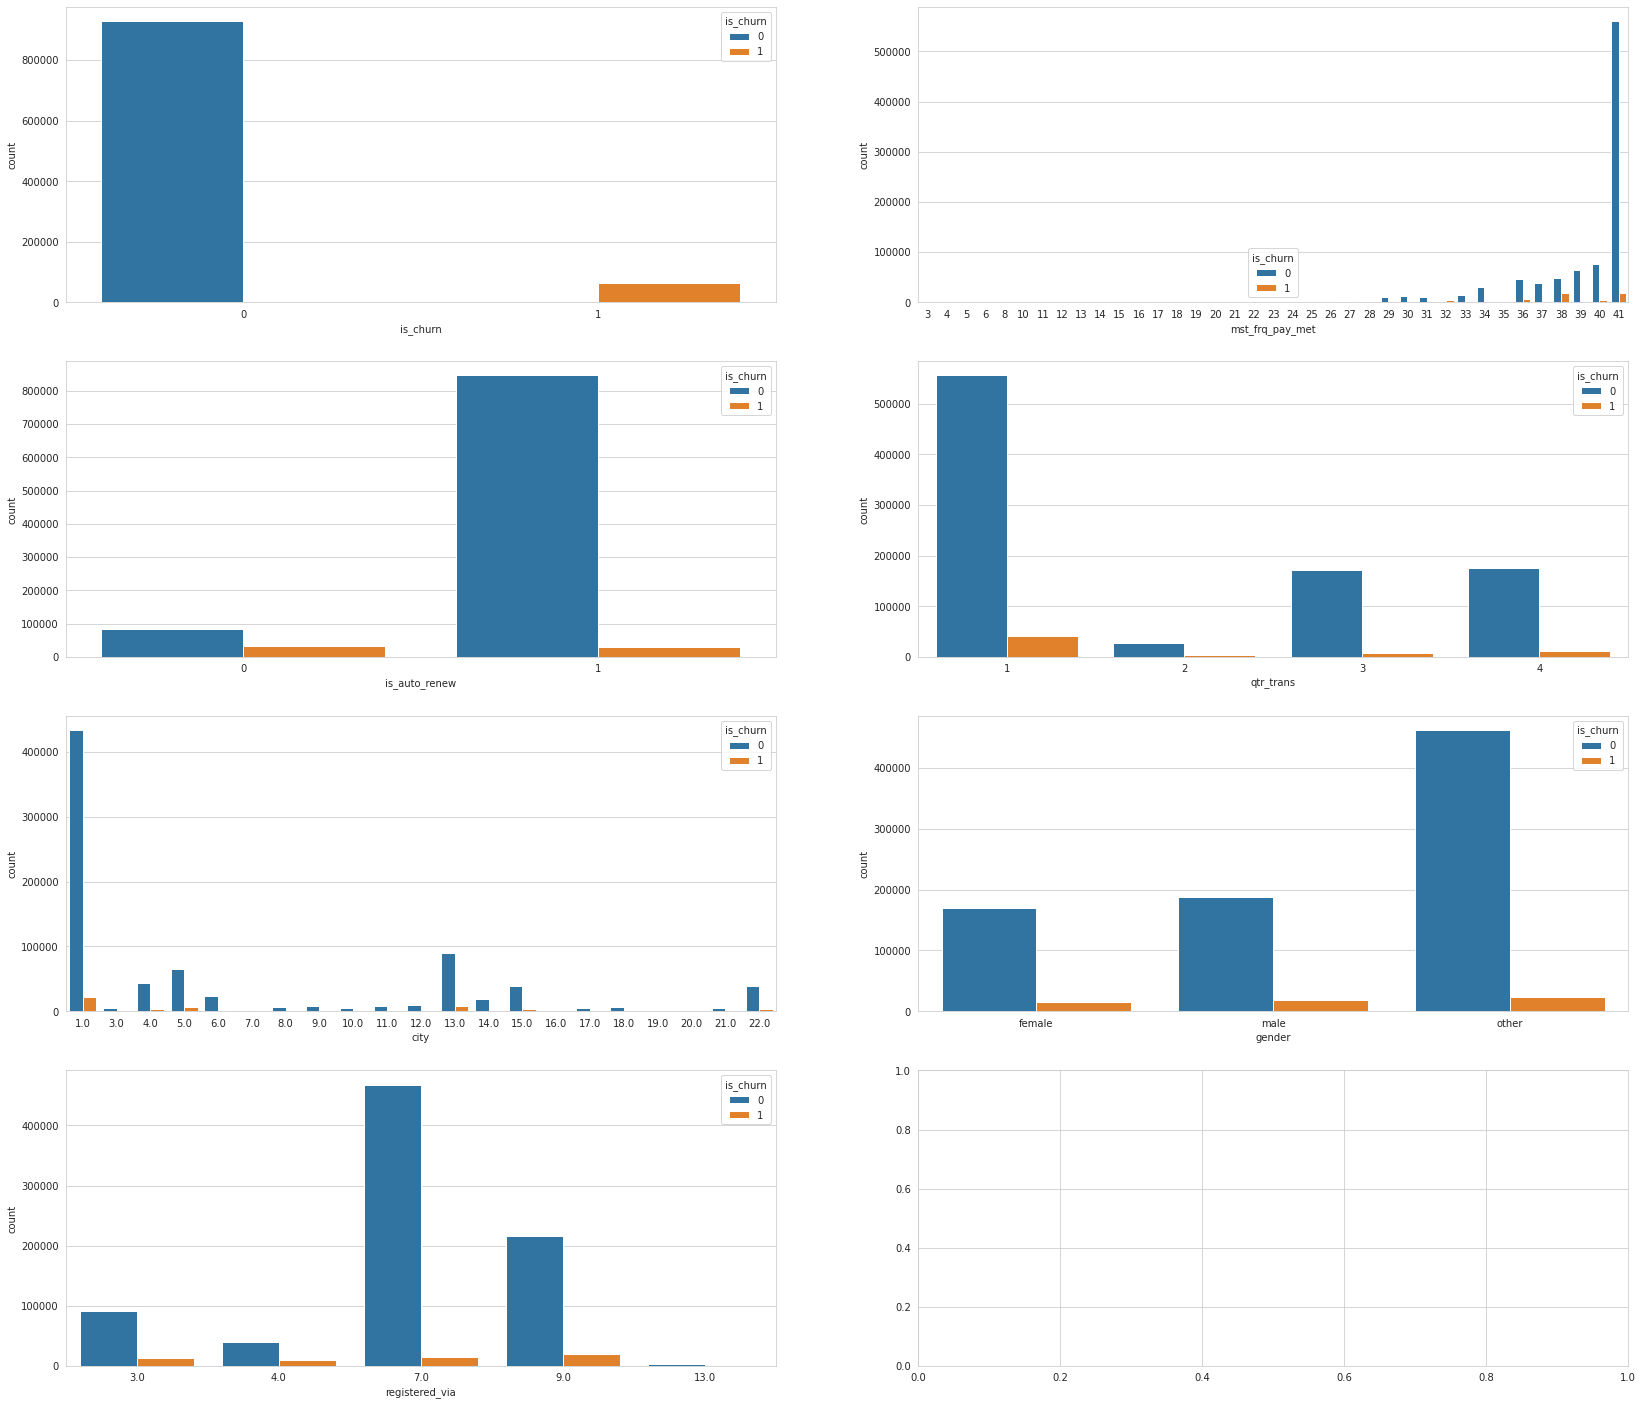

In [13]:
plotting_categorical(df,4,2,hue='is_churn',x_list=categorical,size=(28,25))

*  From the above we can see that the positive class in the targe feature is very small and confirm that data is highly imbalanced.

*  Customers with payment method 38 and 41 and those who are based in city 1 and city 13 are most likely to have churn.

*  Roughly 50% of customers who don't have auto-renew option have churn.

*  Customers with transactions in the first quarter of the year decide to churn.

*  There's not a big difference of churn because of gender.

*  Customers who signed-up via 9 and 7 have more churn.

In [14]:
def plotting_numericalVsTarget(data,rows,cols,x_list,size,target):
  '''Plot numerical data with categorical target feature
  Parameters
  --------------
    data:Data frame with data
    rows:Number of rows in subplot
    cols:Number of columns in subplot
    x_list:List with numerical features names
    size:Tupple with size of plot
    target: Categorical feature 
    
  '''
  plt.rcParams["axes.labelsize"] = 1
  sns.set(font_scale=1)
  pos=0
  f, axes = plt.subplots(nrows=rows, ncols=cols,figsize=size)
  for i in range(0,rows):
    for j in range(0,cols):
      
      sns.boxplot(data=data,ax=axes[i,j],y=x_list[pos],x=target)
      pos+=1

  return(plt.show())

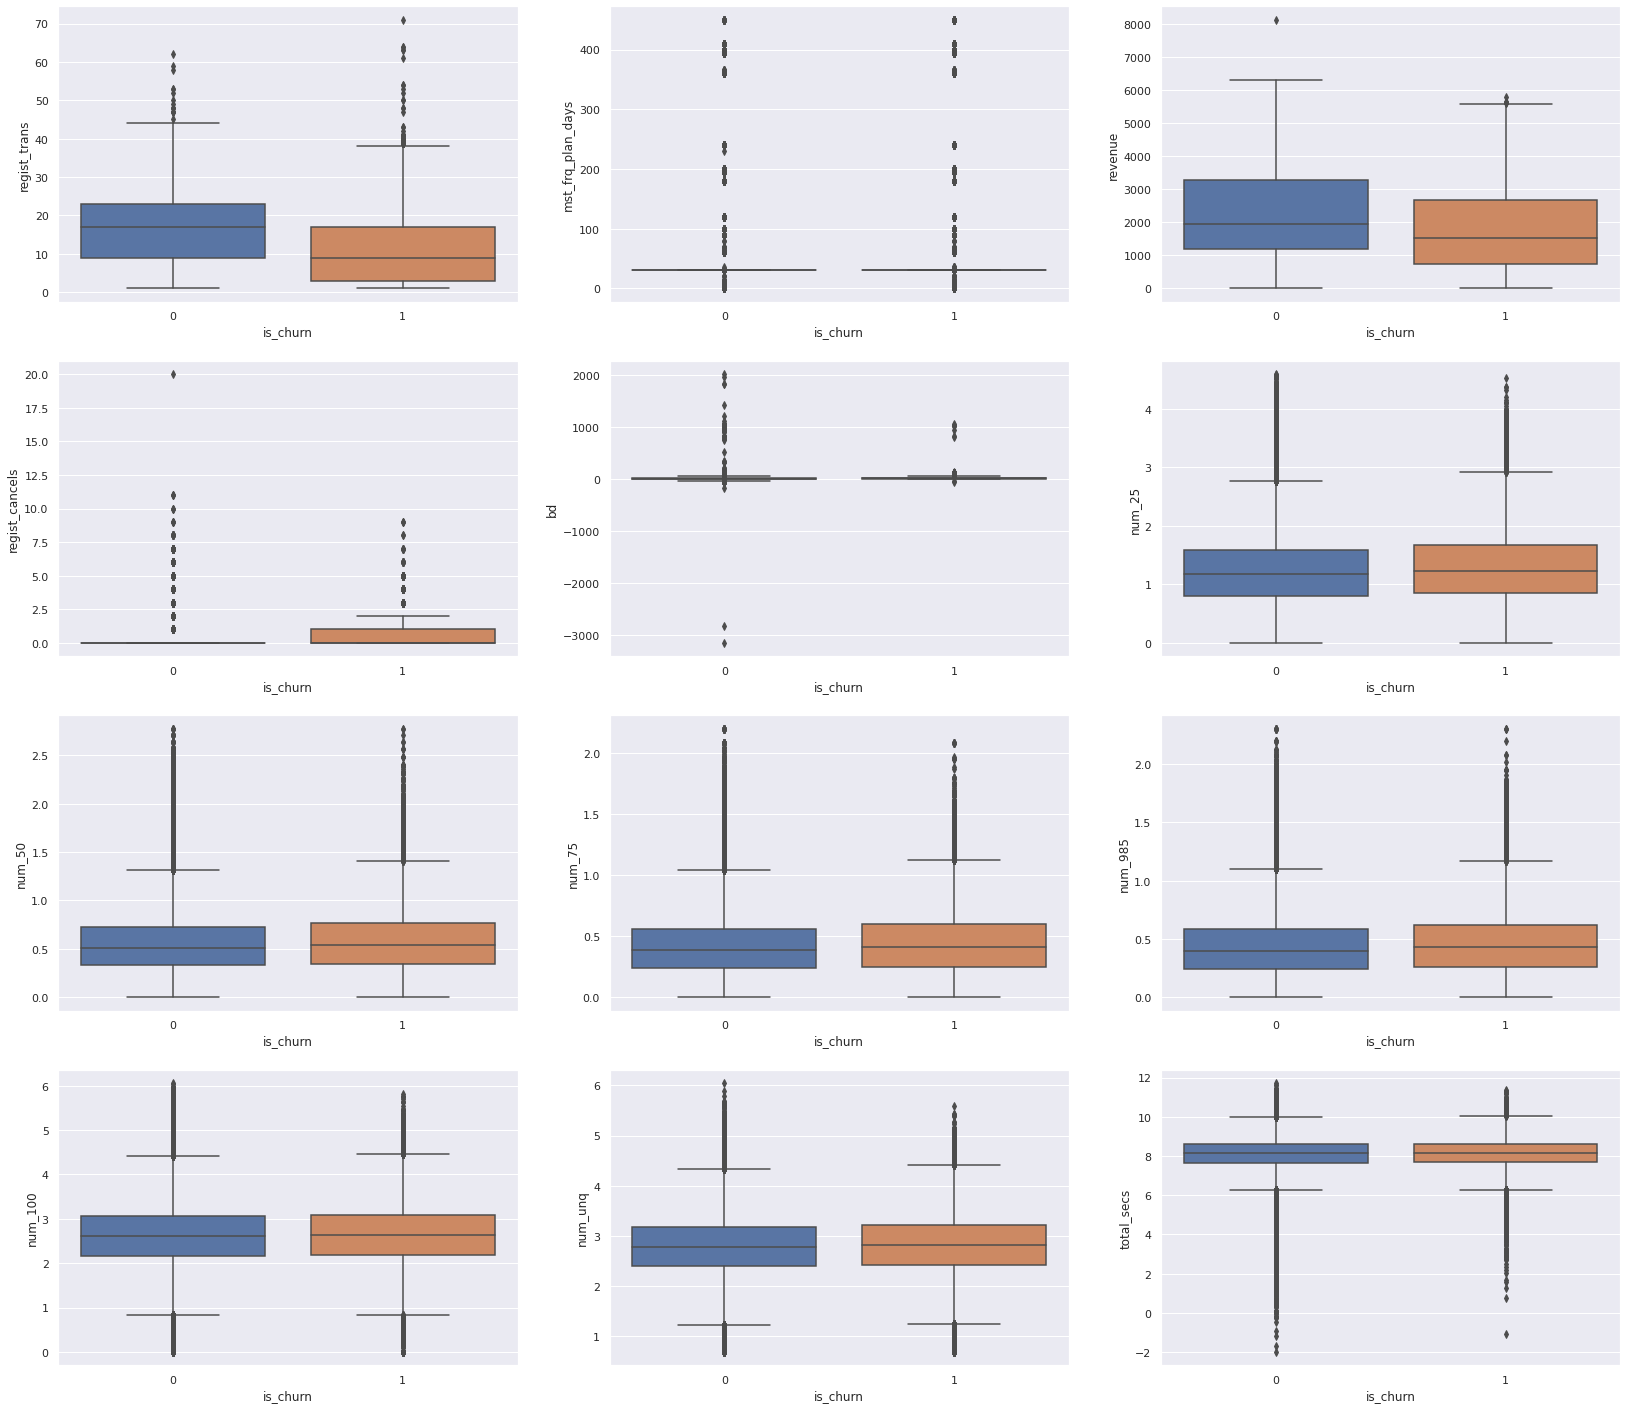

In [15]:
plotting_numericalVsTarget(df,4,3,numerical,(28,25),'is_churn')

# 5. Data Cleaning

In [16]:
#Exploring Age feature

age=pd.DataFrame({'counts':df.bd.value_counts()}).reset_index()
print(age.sort_values(by='index').head(30))
print('=='*20)
print(age.sort_values(by='index',ascending=False).head(30))


      index  counts
189 -3152.0       1
159 -2828.0       1
156  -178.0       1
99    -51.0       9
111   -50.0       7
108   -49.0       7
112   -48.0       7
127   -47.0       3
129   -46.0       3
122   -45.0       4
123   -44.0       4
121   -43.0       4
120   -42.0       5
147   -41.0       2
139   -40.0       2
135   -39.0       2
169   -38.0       1
174   -37.0       1
224   -36.0       1
162   -35.0       1
144   -34.0       2
213   -32.0       1
216   -30.0       1
229   -23.0       1
192   -19.0       1
228    -9.0       1
188    -7.0       1
210    -5.0       1
0       0.0  487488
67      1.0      25
      index  counts
225  2016.0       1
177  1970.0       1
151  1820.0       2
176  1421.0       1
219  1213.0       1
204  1111.0       1
185  1053.0       1
131  1052.0       3
143  1051.0       2
164  1049.0       1
155  1048.0       1
133  1043.0       3
186  1042.0       1
134  1041.0       2
172  1040.0       1
153  1038.0       2
132  1037.0       3
130  1036.0       3


We have serious problems with this feature, because there many corrupted data (negative datapoints and near 50% of the datapoints with value equal to zero. Some data points with value of 1,2,3, showing that a baby has a subscription, as well as people who are 82,83 or more.

I will keep the feature, but I'm gonna replace all corrupted data and NaN with zero. When modeling I will run models with and without the feature to evaluate the performance.

In [17]:
#Replacing corrupted data

#Defining threshold

lower_thresh=5
upper_thresh=80

#Replacing

df.loc[df[df['bd']<lower_thresh].index,'bd']=0
df.loc[df[df['bd']>upper_thresh].index,'bd']=0

#Filling NaN

df.bd.fillna(0,inplace=True)

#Checking

age=pd.DataFrame({'counts':df.bd.value_counts()}).reset_index()
print(age.sort_values(by='index').head(30))
print('=='*20)
print(age.sort_values(by='index',ascending=False).head(30))



    index  counts
0     0.0  604064
69    5.0      14
67    6.0      17
68    7.0      15
76    8.0       6
75    9.0       8
72   10.0      10
73   11.0      10
64   12.0      25
58   13.0      51
50   14.0     234
42   15.0     794
33   16.0    2435
24   17.0    5605
20   18.0    7937
18   19.0    9639
13   20.0   13601
10   21.0   15564
8    22.0   17960
7    23.0   19329
5    24.0   20476
3    25.0   20870
2    26.0   22149
1    27.0   22950
4    28.0   20492
6    29.0   19778
9    30.0   17413
11   31.0   15231
12   32.0   14652
14   33.0   13492
    index  counts
74   80.0      10
71   79.0      12
70   78.0      13
62   77.0      31
65   76.0      22
66   75.0      22
63   74.0      29
61   73.0      38
59   72.0      45
60   71.0      38
57   70.0      60
56   69.0      73
55   68.0      86
54   67.0     139
53   66.0     155
52   65.0     169
51   64.0     197
49   63.0     262
48   62.0     319
47   61.0     395
46   60.0     454
45   59.0     519
44   58.0     548
43   57.0 

In [18]:
#Exploring mst_frq_plan_days

pd.DataFrame({'counts':df.mst_frq_plan_days.value_counts()})


,counts
30,976383
410,3971
195,3170
7,2488
180,2013
120,822
100,800
395,563
60,391
10,372


In [19]:
#Removing missing values from user features

df.dropna(axis=0,subset=['city','gender','registered_via','registration_init_time'],inplace=True)

It seems that feature has a normal behavior. Most of the customers decide a subscripton of 30 days. Later we can transform the feature with log and see what hapen with shape.

# 6. Fixing Formats

In [20]:
df=df.astype({'mst_frq_pay_met':'object','is_auto_renew':'object','mst_frq_pay_met':'object',
           'qtr_trans':'object','city':'object','gender':'object',
           'registered_via':'object'
})

In [21]:
#Fixing date column

df.registration_init_time = pd.to_datetime(df.registration_init_time)

In [22]:
#Checking

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 877161 entries, 0 to 992929
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   msno                    877161 non-null  object        
 1   is_churn                877161 non-null  int64         
 2   regist_trans            877161 non-null  int64         
 3   mst_frq_plan_days       877161 non-null  int64         
 4   mst_frq_pay_met         877161 non-null  object        
 5   revenue                 877161 non-null  int64         
 6   is_auto_renew           877161 non-null  object        
 7   regist_cancels          877161 non-null  int64         
 8   qtr_trans               877161 non-null  object        
 9   city                    877161 non-null  object        
 10  bd                      877161 non-null  float64       
 11  gender                  877161 non-null  object        
 12  registered_via          877161

# **2. Feature Engineering**

Most of the feature engineering tasks were performed in the previous datasets, specially with transactios dataset.

In this section we are going to focus on create a feature that gives the total time in months of the time the customer have had the subscription.

Also, it's imoportant to engineering categorical features (gruoping, etc)


## 7. Create or modify features

In [23]:
#Create a feature that calculate tenure
import datetime

ref_date= datetime.datetime(2017, 3, 31)

df['tenure']=(ref_date-df.registration_init_time)


In [24]:
#Removing text from new feaure

df.tenure=df.tenure.apply(lambda x: str(x).split()[0])

In [25]:
#Expressing tenure in years

df['tenure']=pd.to_numeric(df['tenure'])
df['tenure']=df['tenure']/365

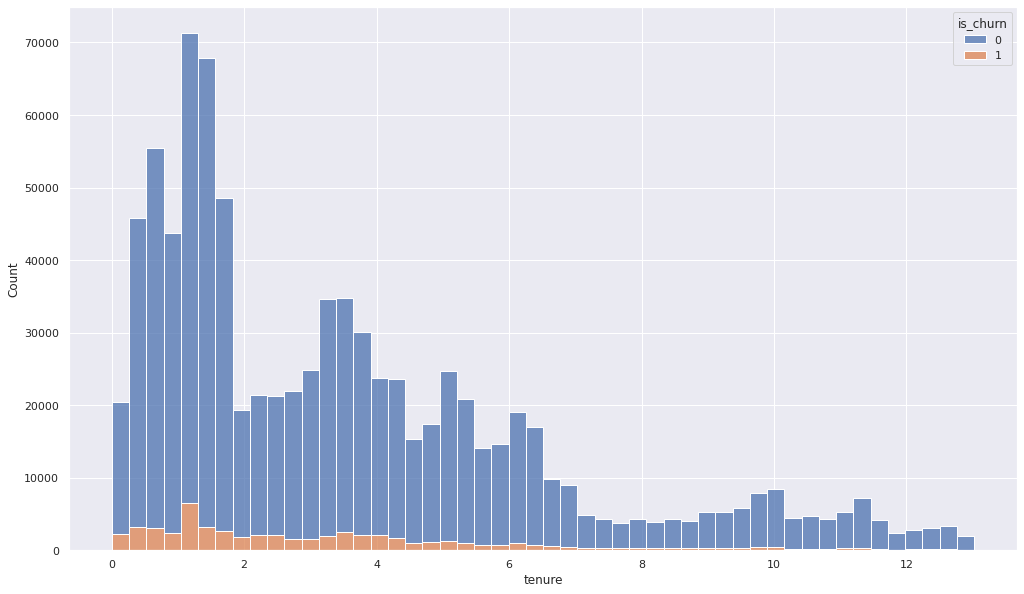

In [26]:
#Exloring new feature
fig=plt.figure(figsize=(17,10))
sns.histplot(data=df,x='tenure',multiple='stack',bins=50,hue='is_churn')

Customers with aprox 1 year of tenure are more likely to have churn. The more tenure the less churn in customers.

In [27]:
df.info(
    
)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 877161 entries, 0 to 992929
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   msno                    877161 non-null  object        
 1   is_churn                877161 non-null  int64         
 2   regist_trans            877161 non-null  int64         
 3   mst_frq_plan_days       877161 non-null  int64         
 4   mst_frq_pay_met         877161 non-null  object        
 5   revenue                 877161 non-null  int64         
 6   is_auto_renew           877161 non-null  object        
 7   regist_cancels          877161 non-null  int64         
 8   qtr_trans               877161 non-null  object        
 9   city                    877161 non-null  object        
 10  bd                      877161 non-null  float64       
 11  gender                  877161 non-null  object        
 12  registered_via          877161

In [28]:
#Engineering mst_frq_pay_met

(df.mst_frq_pay_met.value_counts())

41    474512
40     81042
38     67088
39     65771
36     52621
37     38790
34     27166
33     14249
29     12753
31     10065
30     10001
32      7093
28      2928
27      2408
23      1952
20      1389
19      1049
22      1003
17       918
21       851
35       762
18       712
16       688
14       462
13       330
12       246
11        70
15        62
10        43
26        42
8         34
25        24
24        13
3          9
6          7
5          7
4          1
Name: mst_frq_pay_met, dtype: int64

We are going to create a new category ```other``` that retains categories that have less than 0.5% of data.

Let's create a function to automate that task.

In [29]:
def regroup_categories(data,feature,threshold=0.005,new_category='other'):
  
  
  print('Initial categories: ',len(data[feature].value_counts()))

  for_index=pd.DataFrame({'percent':data[feature].value_counts()/data.shape[0]})
  to_replace=for_index[for_index['percent']<=threshold].index
  

  for i in to_replace:

    data.loc[data[data[feature]==i].index,feature]=new_category

  print('Final categories: ',len(data[feature].value_counts()))



In [30]:
regroup_categories(df,'mst_frq_pay_met')

Initial categories:  37
Final categories:  13


In [31]:
#The same for registered_via and city

regroup_categories(df,'registered_via')
print('\n')
regroup_categories(df,'city')


Initial categories:  5
Final categories:  5


Initial categories:  21
Final categories:  18


## **8. Data Transformation**

We are gonna apply log tranformation for the following features: ```regist_trans  mst_frq_plan_days  revenue regist_cancels  bd```



In [35]:
temp=df.loc[:,['regist_trans','mst_frq_plan_days','revenue','regist_cancels']]
temp=np.log1p(temp)

In [40]:
feat=temp.columns
feat=['regist_trans', 'mst_frq_plan_days', 'revenue', 'regist_cancels']

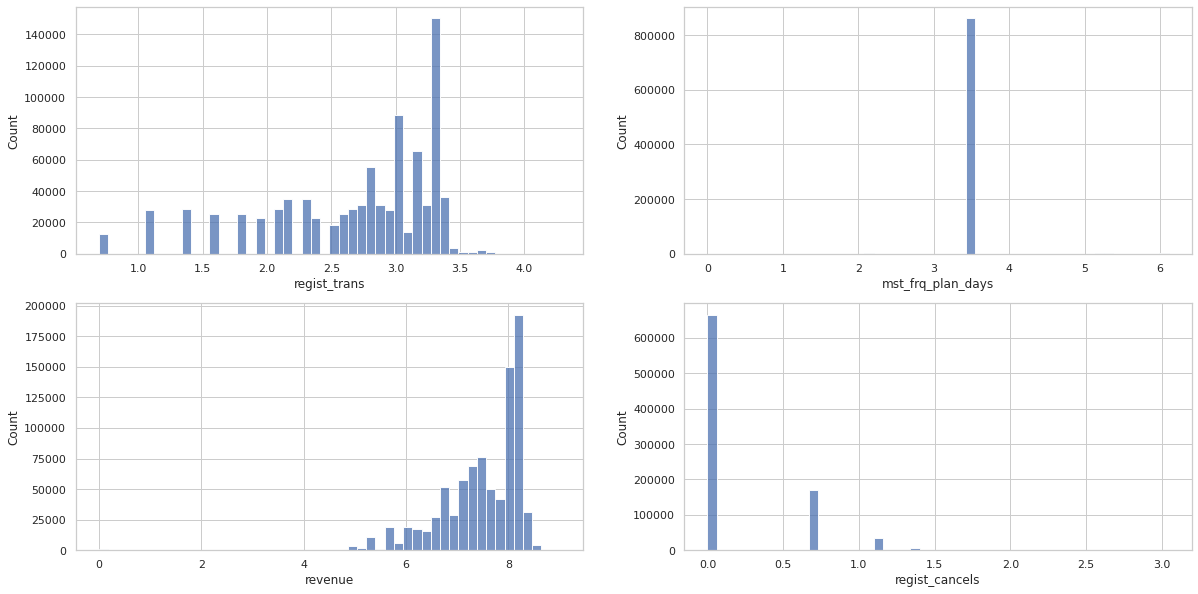

In [46]:
plotting_numerical(temp,2,2,feat,(20,10))

There are no big changes in comparison with original data. We are gonna keep the original data for these features.

The remaining features won't be transformed because they were transformed previously

**Split data into Train and Test**

We have numeric features with missing values, we are gonna impute them. Also, the idea is to scale the features like age and revenue.



In [68]:
from  sklearn.model_selection import train_test_split

y=df[['is_churn']]

for_x=[x for x in df.columns if x not in['msno','is_churn','registration_init_time']]

X=df.loc[:,for_x]

X=pd.get_dummies(X,drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [70]:
print(X_train.shape)
print(X_test.shape)

(701728, 52)
(175433, 52)


In [76]:
#Imputation

from sklearn.impute import SimpleImputer

imputer=SimpleImputer(missing_values=np.nan,strategy='median')

#Fitting the imputer

num=['num_25','num_50','num_75','num_985','num_100','num_unq','total_secs']
imputer.fit(X_train[num])
X_train_transform=imputer.transform(X_train[num])
X_test_transform=imputer.transform(X_test[num])

#Transforming data
X_train[num]=X_train_transform
X_test[num]=X_test_transform

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [71]:
print(X_train.shape)
print(X_test.shape)

(701728, 52)
(175433, 52)


## **9. Outlier Detection**

We are gonna detect outliers in features created in this notebook and features from transactions dataset.

The rest of the features will not receive outlier detection because we did that task before.

In [80]:
to_outlier=['regist_trans','regist_cancels','total_secs','tenure']



In [81]:
def remove_outliers(data,features):

  '''
  This function removes outliers.
  The function detects and deletes outliers based on Z-score.
  
  Note: Use this function only if the amount of data is quite big.
  
  Parameters:
  -------------------
  data: dataset to be analyzed
  features: List of numerical features in the dataset
  '''
  
  to_del=[]
  for i in features:
    mean=data[i].mean()
    stand=data[i].std()
    ind_upper=[]
    ind_lower=[]
    ind=[]
    data['Z_score']=(data[i]-mean)/stand
    print(data[(data['Z_score']>3) | (data['Z_score']<-3)].shape[0],' outliers detected for ',i)
    to_del.append(data[(data['Z_score']>3) | (data['Z_score']<-3)].shape[0])
    ind_upper=data[data['Z_score']>3].index
    ind_lower=data[data['Z_score']<-3].index
    ind=ind_upper.append(ind_lower)
    
    mean_to_replace=data[(data['Z_score']<3) & (data['Z_score']>-3)][i].mean()
    
    data.drop(ind,inplace=True)
  print('total outliers removed: ',sum(to_del))
  data.drop(columns='Z_score',inplace=True)

In [82]:
remove_outliers(X_train,to_outlier)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


142  outliers detected for  regist_trans


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


5845  outliers detected for  regist_cancels


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


8808  outliers detected for  total_secs


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


4041  outliers detected for  tenure
total outliers removed:  18836


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# **10. Scaling Features**

To increase performance while modeling, we are gonna scale the following features.

In [86]:
to_scale=['regist_trans','mst_frq_plan_days','revenue','regist_cancels','bd','tenure']

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(X_train[to_scale])

X_train_scaled=scaler.transform(X_train[to_scale])
X_test_scaled=scaler.transform(X_test[to_scale])

X_train[to_scale]=X_train_scaled
X_test[to_scale]=X_test_scaled

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [88]:
#Exporting data

X_train.to_csv('/content/drive/MyDrive/Colab Notebooks/KKBOX/X_train.csv0',index=False)
X_test.to_csv('/content/drive/MyDrive/Colab Notebooks/KKBOX/X_test.csv',index=False)
y_train.to_csv('/content/drive/MyDrive/Colab Notebooks/KKBOX/y_train.csv',index=False)
y_test.to_csv('/content/drive/MyDrive/Colab Notebooks/KKBOX/X_test.csv',index=False)